In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('lemonade.csv')

In [12]:
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


In [219]:
# get outliers
def get_outliers(df , col, lquan=.25, upquan=.75, case = 1.5, direction=None, graph=False, remove= True ):
    q1 = df[col].quantile(lquan)
    q3 = df[col].quantile(upquan)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-case*iqr
    upper_bound = q3+case*iqr
    
    if graph == True:
        plt.axvline(lower_bound, c= 'b')
        plt.axvline(upper_bound, c='r')
        sns.boxplot(x=df[col])
        plt.show()
    if remove == False:
        if direction == 'lower':
            df = df.loc[(df[col] < lower_bound)]
        elif direction == 'upper':
            df = df.loc[(df[col] > upper_bound)]
        else:
            df = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if remove == True:
        if direction == 'lower':
            df = df.loc[(df[col] > lower_bound)]
        elif direction == 'upper':
            df = df.loc[(df[col] < upper_bound)]
        else:
            df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
        

        
    return df

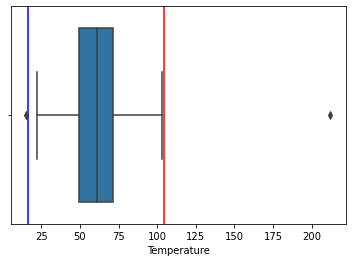

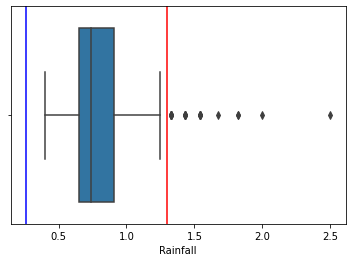

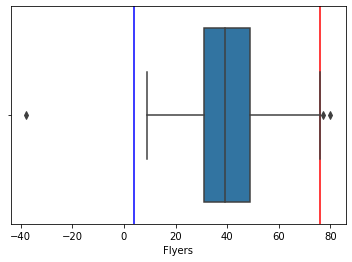

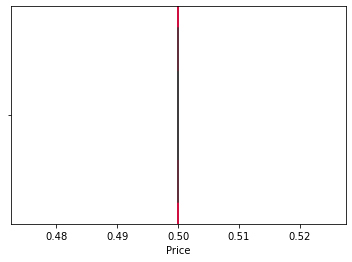

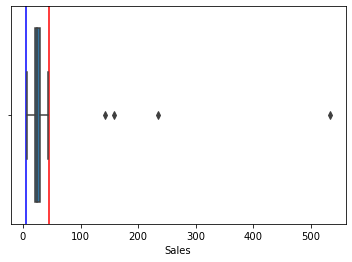

In [275]:
df_list = []
for i in df.drop(columns=['Date', 'Day']).columns:
    df_list.append(get_outliers(df, i, graph=True))

In [276]:
#Temp , upper outlier too extreme for this case
#     , lower outlier fine for this case         
df_list[0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
359,12/26/17,Tuesday,28.9,1.43,23,0.5,13
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15


In [277]:
#Rainfall, none in lower bound, upper bound doesnt have anything that shoukd be considered an outlier
df_list[1]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
8,1/9/17,Monday,38.1,1.18,20,0.5,17
9,1/10/17,Tuesday,43.4,1.05,33,0.5,18
...,...,...,...,...,...,...,...
357,12/24/17,Sunday,35.8,1.25,26,0.5,16
358,12/25/17,Monday,35.5,1.25,19,0.5,15
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16


In [278]:
#flyers
df_list[2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [279]:
#price no upper or lowerbounds found as the sale was consistantly the same
df_list[3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [157]:
#Sales  #peek weekend 4th of july weekend could spell high sells, flagged but wont drop
df_list[4]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


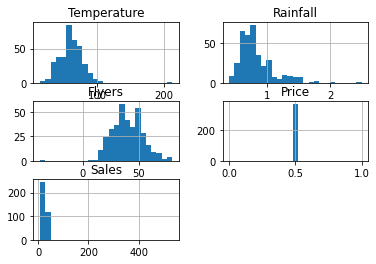

In [158]:
df.hist(bins=25)
plt.show()

In [300]:
def get_sigma_percent(df, col, step = 1, outliers = False):
    print(np.round((len(df.loc[(df[col] < df[col].mean() + (df[col].std()) * step) & (df[col] > df[col].mean() - (df[col].std()) * step)]) / len(df)),4))
    if outliers:
        return df.loc[(df[col] > df[col].mean() + (df[col].std()) * step) | (df[col] < df[col].mean() - (df[col].std()) * step)]

In [301]:
#temp without outliers removed
get_sigma_percent(df, 'Temperature', step = 1)

0.7096


In [302]:
get_sigma_percent(df, 'Temperature', step = 2)

0.9726


In [303]:
get_sigma_percent(df, 'Temperature', step = 3)

0.9973


In [304]:
#Temp Passes

In [305]:
#Rainfall without removing outliers 
get_sigma_percent(df, 'Rainfall', step = 1)

0.7918


In [306]:
get_sigma_percent(df, 'Rainfall', step = 2)

0.9479


In [307]:
get_sigma_percent(df, 'Rainfall', step = 3)

0.9863


In [308]:
#only 1 std passes, lets remove outliers and try again

In [309]:
rain_removed = get_outliers(df,'Rainfall',remove=True)

In [310]:
get_sigma_percent(rain_removed, 'Rainfall', step=1)

0.6884


In [311]:
get_sigma_percent(rain_removed, 'Rainfall', step = 2)

0.9525


In [312]:
get_sigma_percent(rain_removed, 'Rainfall', step = 3)

1.0


In [313]:
#with outliers removed it passes

In [314]:
#Flyers without outliers removed 
get_sigma_percent(df, 'Flyers', step = 1)

0.7096


In [315]:
get_sigma_percent(df, 'Flyers', step = 2)

0.9644


In [316]:
get_sigma_percent(df, 'Flyers', step = 3)

0.9973


In [317]:
#Passes without removing outliers

In [318]:
#no outliers for price

In [319]:
#sales 
get_sigma_percent(df, 'Sales', step = 1)

0.989


In [320]:
get_sigma_percent(df, 'Flyers', step = 2)

0.9644


In [321]:
get_sigma_percent(df, 'Flyers', step = 3)

0.9973


In [322]:
#Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv
get_sigma_percent(df, 'Temperature', step = 3, outliers=True)

0.9973


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [323]:
#Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv
get_sigma_percent(df, 'Rainfall', step = 3, outliers=True)

0.9863


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [324]:
get_sigma_percent(df, 'Flyers', step = 3, outliers=True)

0.9973


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [325]:
get_sigma_percent(df, 'Price', step = 3, outliers=True)

0.0


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [326]:
get_sigma_percent(df, 'Sales', step = 3, outliers=True)

0.989


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
